In [18]:
import matplotlib.pyplot as plt
import numpy as np


N = 100
T = 1000
g = 0.2

arr_n = np.stack([np.arange(N) for _ in range(T)]).T
arr_t = np.stack([np.arange(T) for _ in range(N)])
W = 1 - np.exp(-((arr_n / N - arr_t / T) ** 2) / 2 / g / g)

arr_n.shape, arr_t.shape

((100, 1000), (100, 1000))

In [36]:
import torch

arr_n = torch.arange(N).repeat(T, 1).transpose(0, 1)
arr_t = torch.arange(T).repeat(N, 1)
W = 1 - torch.exp(-((arr_n / N - arr_t / T) ** 2) / 2 / g ** 2)

# arr_n.shape, arr_t.shape
arr_n.shape, arr_t.shape, W.shape

(torch.Size([100, 1000]), torch.Size([100, 1000]), torch.Size([100, 1000]))

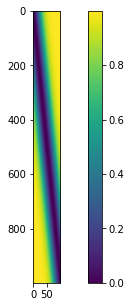

In [37]:
plt.figure(figsize=(10, 5))
plt.imshow(W.T)
plt.colorbar()
plt.show()

In [15]:
W.shape

(100, 1000)

In [20]:
def save_figure_to_numpy(fig):
    # save it to a numpy array.
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return data

def plot_alignment_to_numpy(alignment, info=None):
    fig, ax = plt.subplots(figsize=(6, 4))
    im = ax.imshow(alignment, aspect='auto', origin='lower', interpolation='none')
    fig.colorbar(im, ax=ax)
    xlabel = 'Decoder timestep'
    if info is not None:
        xlabel += '\n\n' + info
    plt.xlabel(xlabel)
    plt.ylabel('Encoder timestep')
    plt.tight_layout()

    fig.canvas.draw()
    data = save_figure_to_numpy(fig)
    plt.close()
    return data

/tmp/ipykernel_22397/1700012560.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')


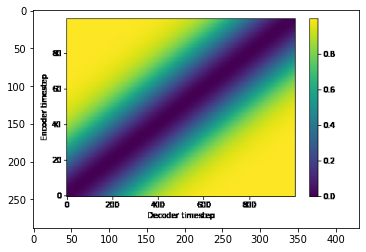

In [35]:
plt.imshow(plot_alignment_to_numpy(W))

In [40]:
l = [torch.tensor(1), torch.tensor(2), torch.tensor(3)]

torch.mean(l)

TypeError: mean(): argument 'input' (position 1) must be Tensor, not list

In [3]:
import torch

N, T = 100, 1000
g = 0.2


_arr_n = torch.arange(N).repeat(T, 1)
_arr_t = torch.arange(T).repeat(N, 1).transpose(0, 1)
W = 1 - torch.exp(-((_arr_n / N - _arr_t / T) ** 2) / 2 / g ** 2)

print(W.shape)

torch.Size([1000, 100])


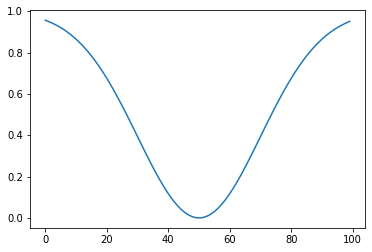

In [9]:
import matplotlib.pyplot as plt

plt.plot(W[500])